### 1. Import

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

import statsmodels.api as sm

/Users/tami/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Import dataset
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
df.info()
# we have ~44k samples (~4.3 MB)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [4]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


### 2. Wrangle

In [5]:
# Drop `No` column (it's just an index)
df.drop('No', axis=1, inplace=True)

In [6]:
# Rename columns
df.columns = ['year', 'month', 'day', 'hour', 'pm25', 'dewp', 'temp', 'pres', 'wind_dir', 'wind_speed', 'snow_hours', 'rain_hours']
df.head()

,year,month,day,hour,pm25,dewp,temp,pres,wind_dir,wind_speed,snow_hours,rain_hours
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [7]:
# Set DateTime Index
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('date', inplace=True)
df.head()
df.tail()

,year,month,day,hour,pm25,dewp,temp,pres,wind_dir,wind_speed,snow_hours,rain_hours
date,,,,,,,,,,,,
2010-01-01 00:00:00,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


,year,month,day,hour,pm25,dewp,temp,pres,wind_dir,wind_speed,snow_hours,rain_hours
date,,,,,,,,,,,,
2014-12-31 19:00:00,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
2014-12-31 22:00:00,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
2014-12-31 23:00:00,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [8]:
# Drop redundant information (year, month, day, and hour) that is now in the datetime index
df = df[['pm25', 'dewp', 'temp', 'pres', 'wind_speed', 'snow_hours', 'rain_hours']]

In [9]:
# Check for missing values
print('Missing values (%)')
print('------------------')
df.isnull().sum()/df.shape[0]*100

Missing values (%)
------------------


pm25          4.716594
dewp          0.000000
temp          0.000000
pres          0.000000
wind_speed    0.000000
snow_hours    0.000000
rain_hours    0.000000
dtype: float64

Less than 5% of data is missing. Let's just drop those points.


In [10]:
# Drop missing values
df.dropna(how='any', inplace=True)

df.shape
df.head()

(41757, 7)

,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
date,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0


This brought us down to ~42k obs.

### 3. EDA

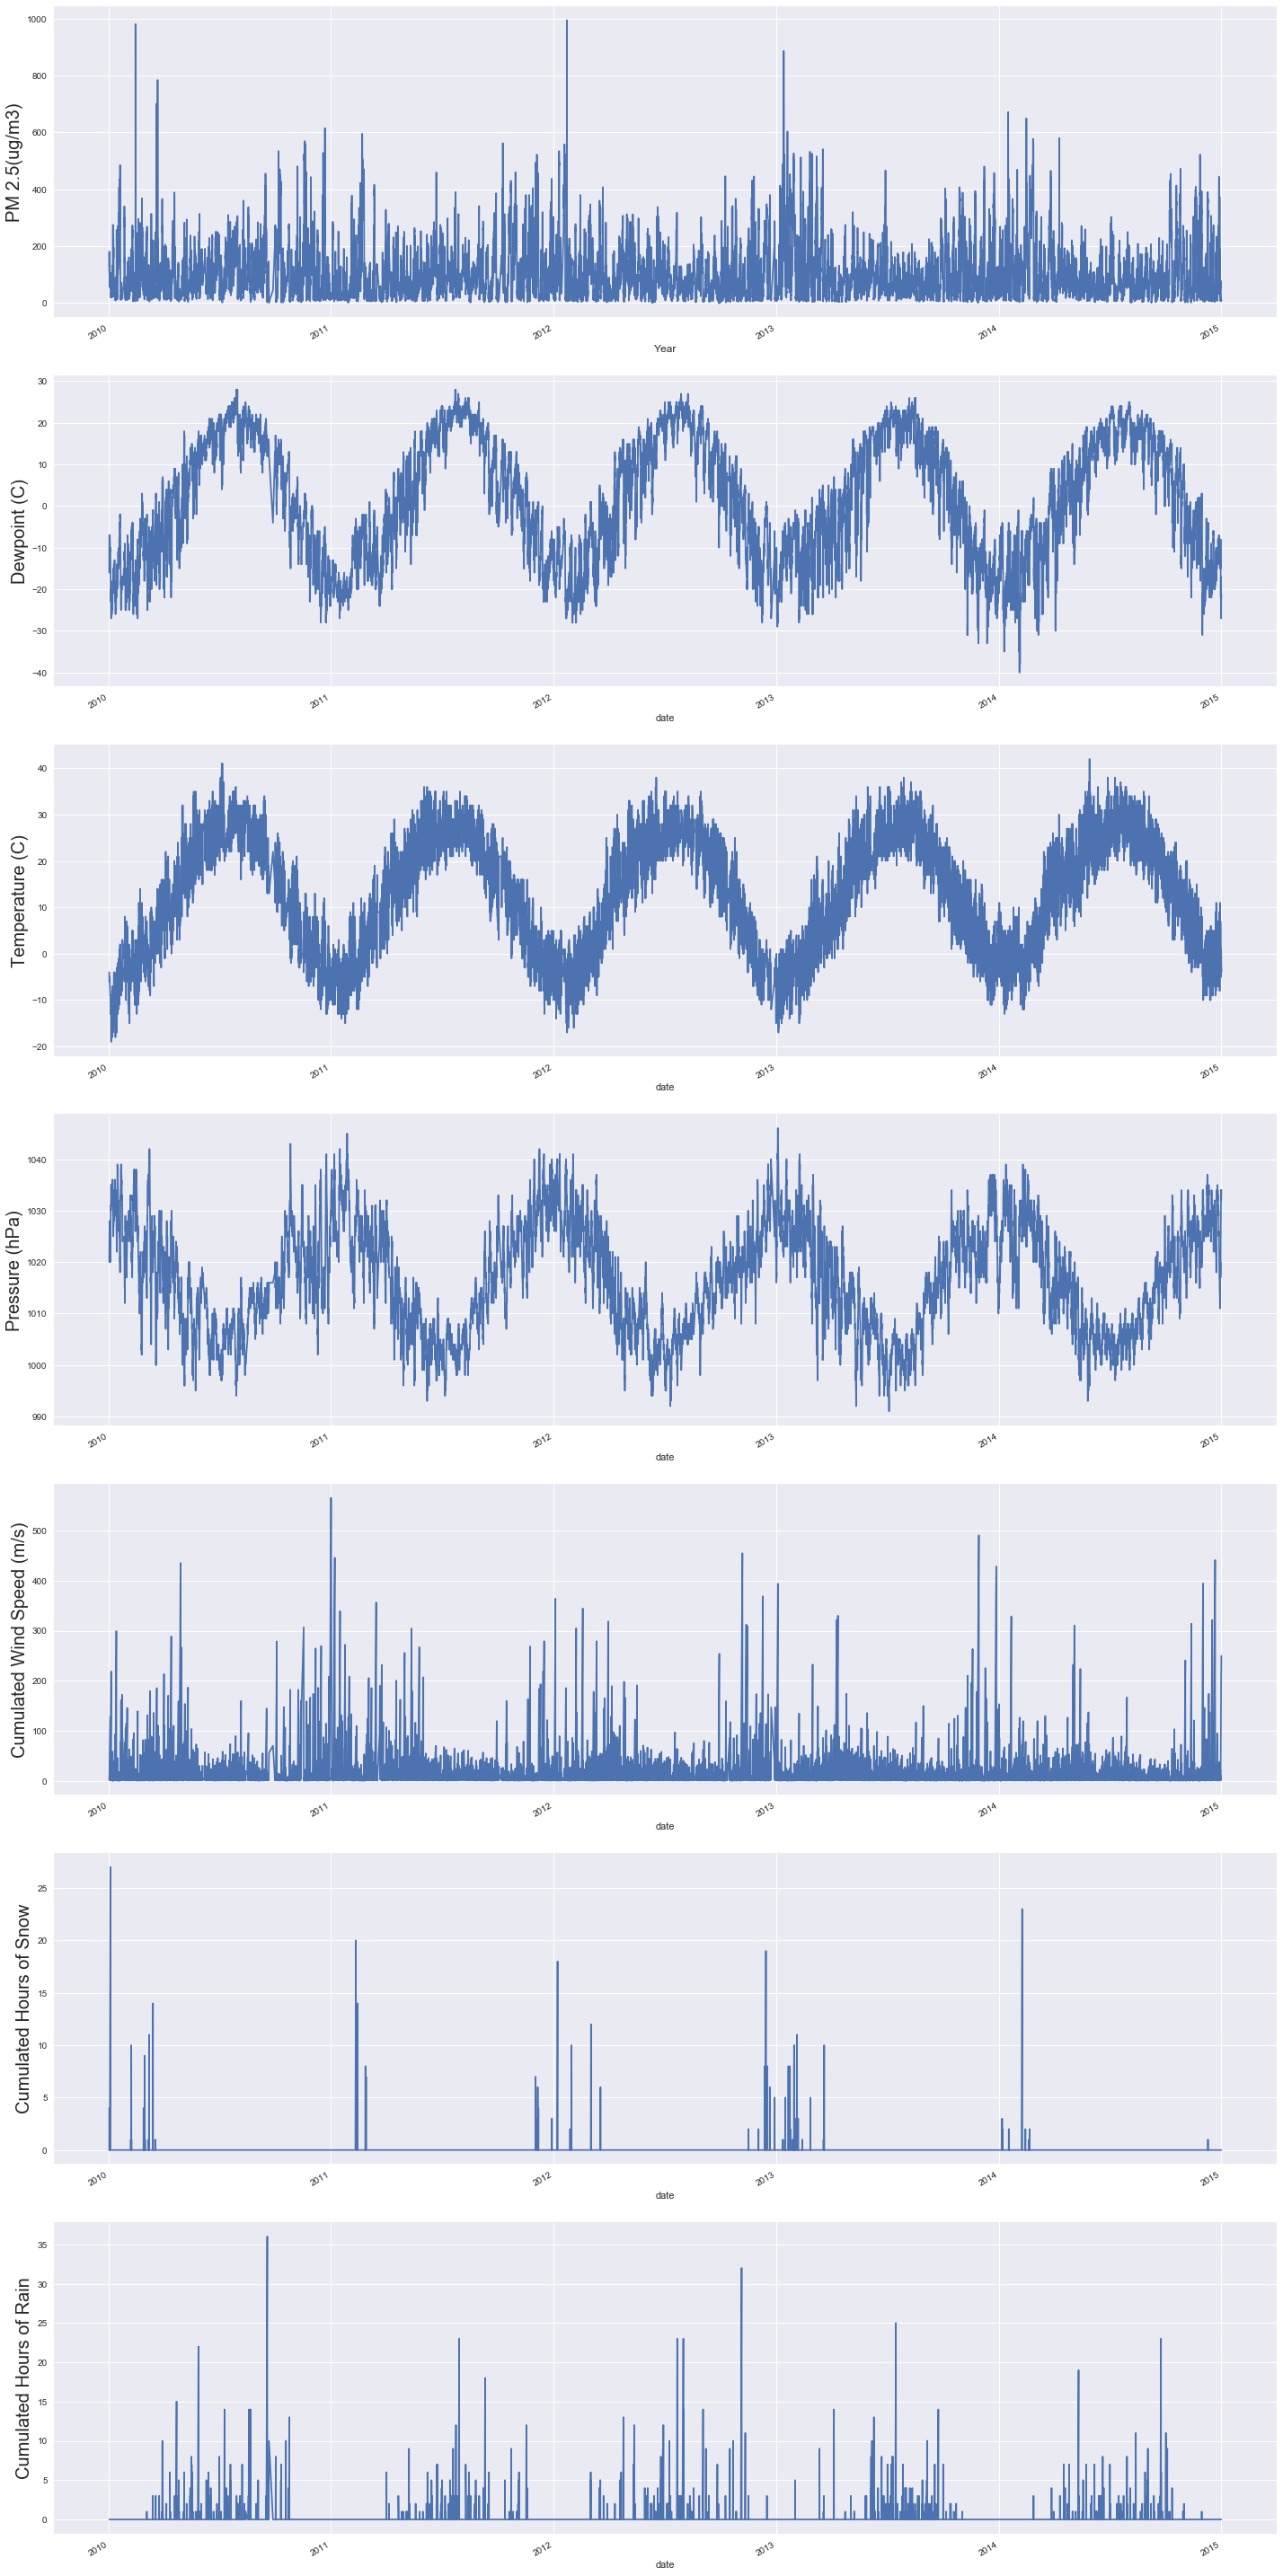

In [11]:
# Let's look at all of the time series
plt.figure(figsize=(20, 40))
plt.subplot(7,1,1)
df['pm25'].plot()
plt.ylabel('PM 2.5(ug/m3)', fontsize=20)
plt.xlabel('Year', fontsize=12)

plt.subplot(7,1,2)
df['dewp'].plot()
plt.ylabel('Dewpoint (C)', fontsize=20)

plt.subplot(7,1,3)
df['temp'].plot()
plt.ylabel('Temperature (C)', fontsize=20)

plt.subplot(7,1,4)
df['pres'].plot()
plt.ylabel('Pressure (hPa)', fontsize=20)

plt.subplot(7,1,5)
df['wind_speed'].plot()
plt.ylabel('Cumulated Wind Speed (m/s)', fontsize=20)

plt.subplot(7,1,6)
df['snow_hours'].plot()
plt.ylabel('Cumulated Hours of Snow', fontsize=20) 

plt.subplot(7,1,7)
df['rain_hours'].plot()
plt.ylabel('Cumulated Hours of Rain', fontsize=20) 

plt.tight_layout();


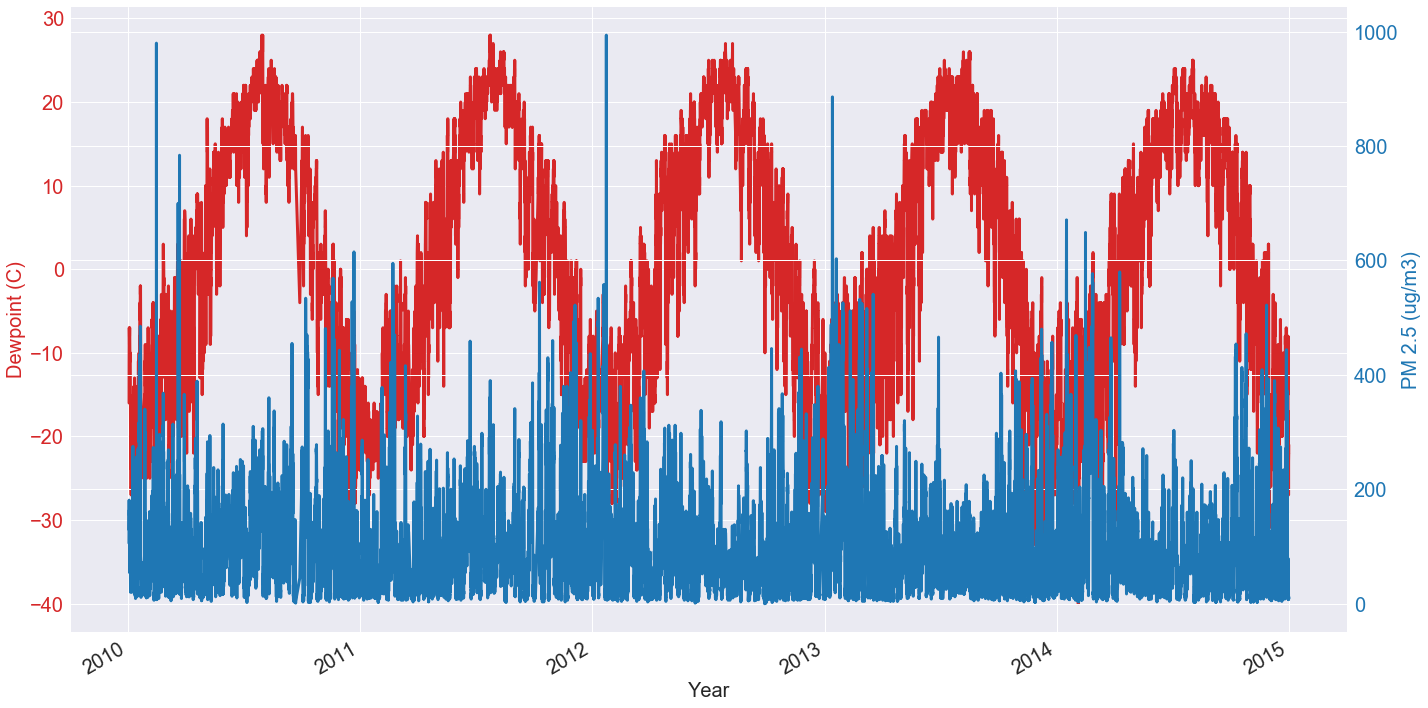

In [12]:
# Look for correlation between pm25 and dewpoint
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['dewp']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Dewpoint (C)', fontsize=20, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
df[['pm25']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=20, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();  

- As expected, `dewpoint` and `pm2.5` appear anti-correlated.
- Both have a pronounced seasonal component.

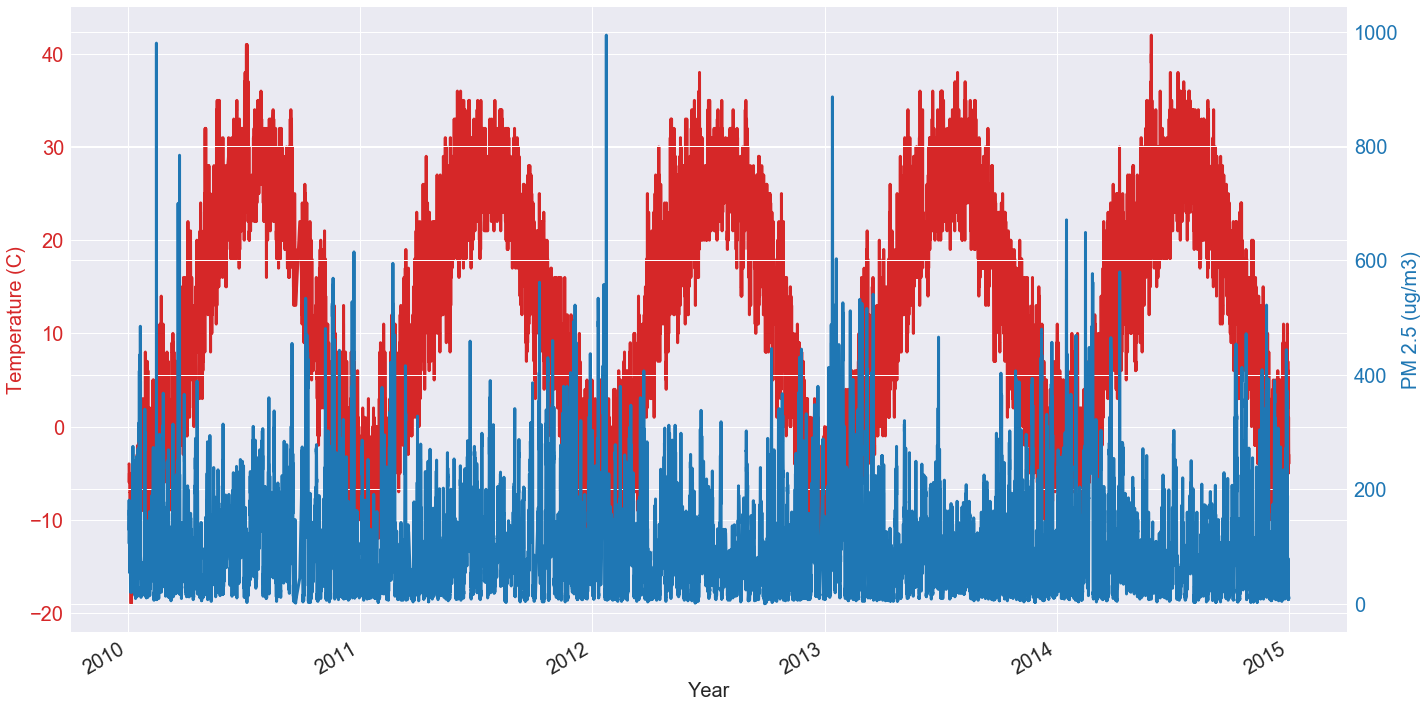

In [13]:
# Look for correlation between pm25 and temperature
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['temp']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Temperature (C)', fontsize=20, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=20, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();  

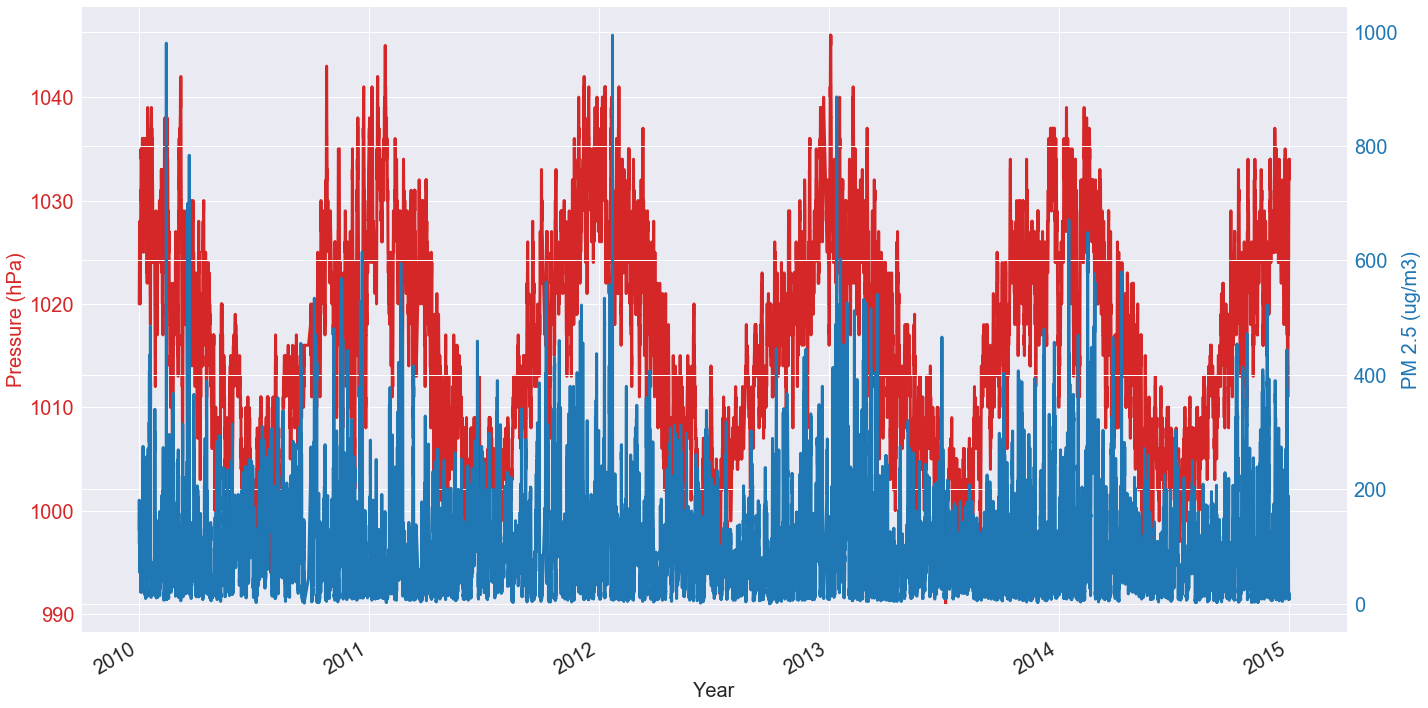

In [14]:
# Look for correlation between pm25 and pressure
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['pres']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Pressure (hPa)', fontsize=20, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=20, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();  

- Surface pressure and PM 2.5 correlate well and have similar seasonality.

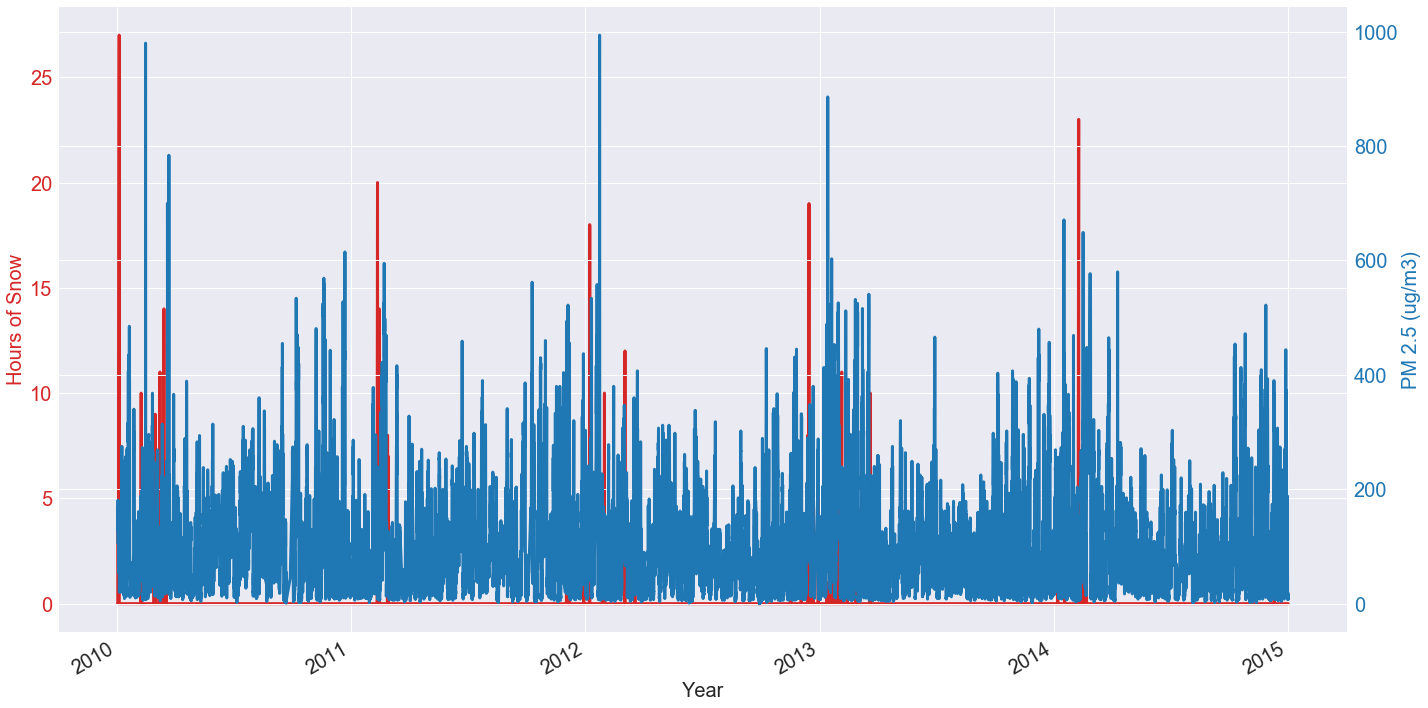

In [15]:
# Look for correlation between pm25 and snow hours
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['snow_hours']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Hours of Snow', fontsize=20, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=20, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();  

- `pm2.5` peaks lag behind snowfall.

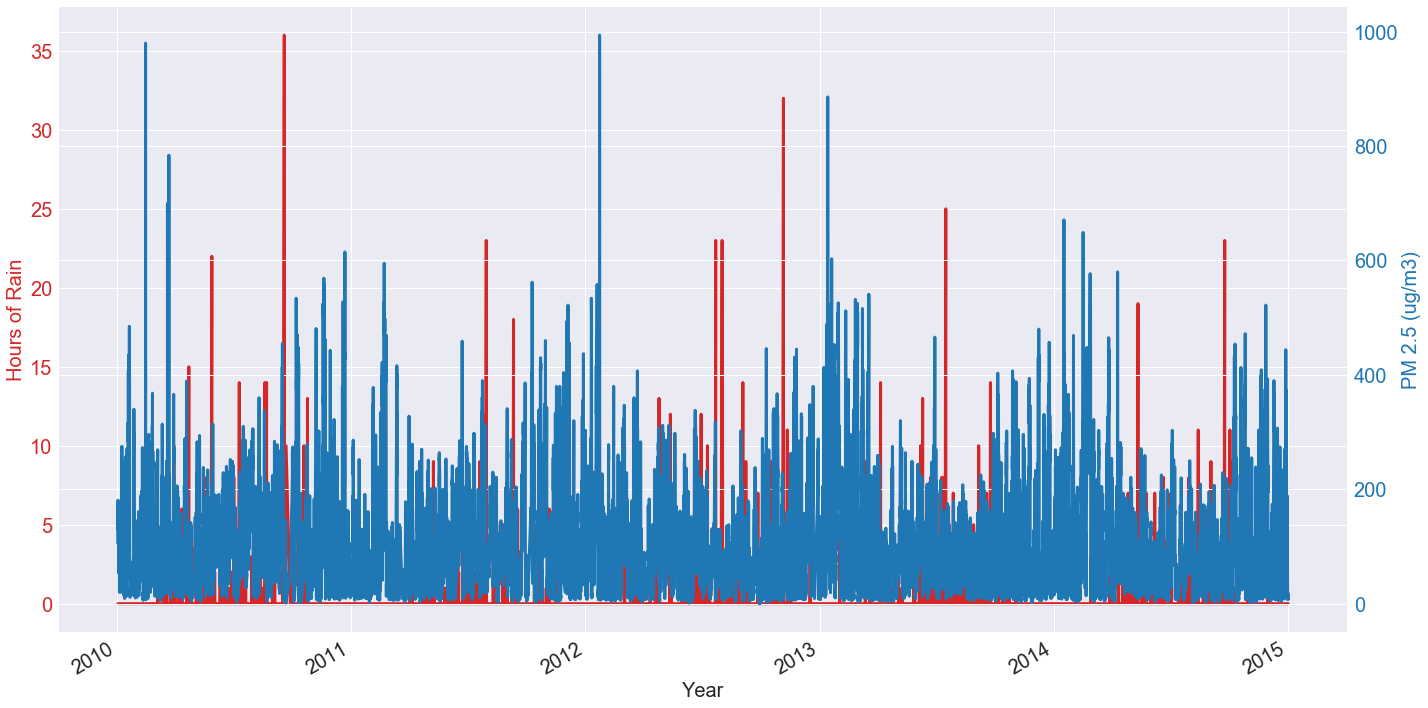

In [16]:
# Look for correlation between pm25 and rain hours
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['rain_hours']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Hours of Rain', fontsize=20, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=20, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout();  

- `pm2.5` peaks appear anticorelated with rainfall, as expected (rain pulls pm2.5 out of the atmosphere). 

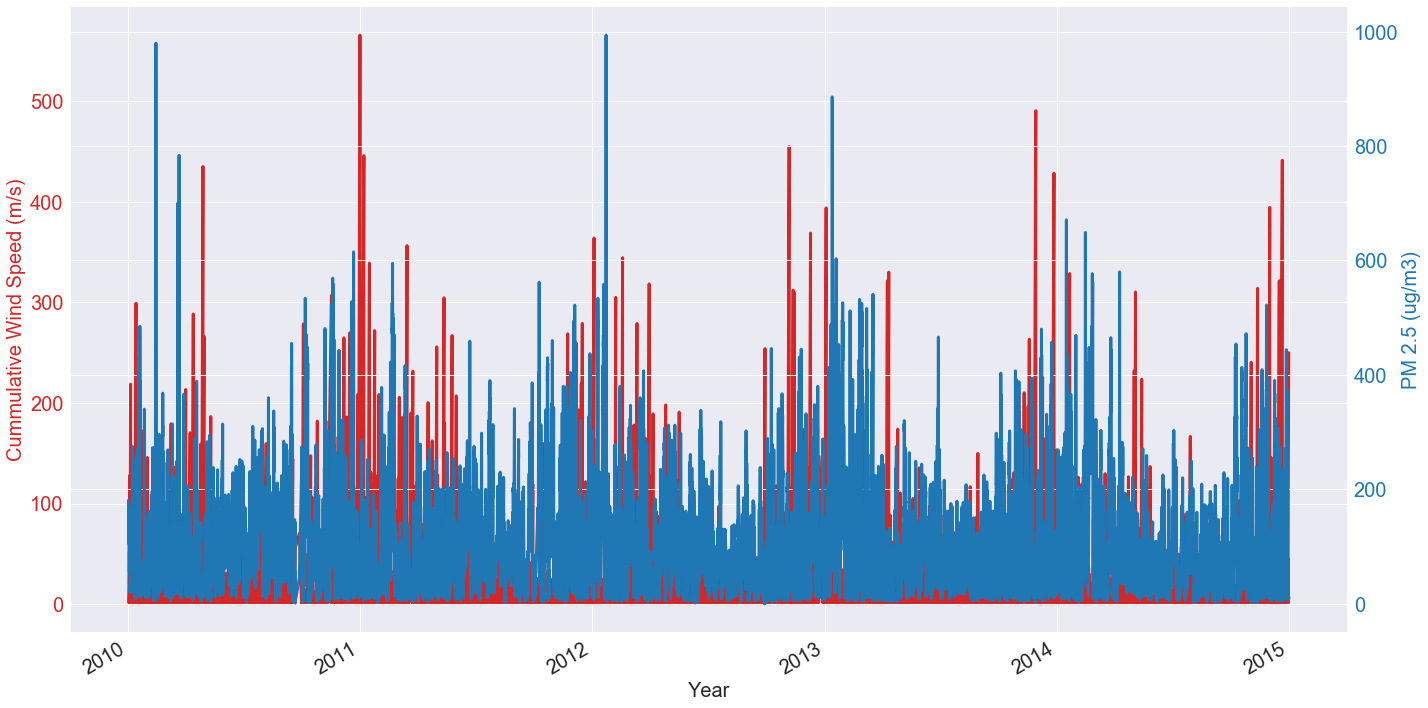

In [21]:
# Look for correlation between pm25 and cummulative wind speed
fig, ax1 = plt.subplots()
color = 'tab:red'
df[['wind_speed']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax1, color=color, legend=False)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Cummulative Wind Speed (m/s)', fontsize=20, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
df[['pm25']].plot(figsize=(20,10), linewidth=3, fontsize=20, ax=ax2, color=color, legend=False)
ax2.set_ylabel('PM 2.5 (ug/m3)', fontsize=20, color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout(); 

- The seasonality of `pm2.5` and `wind-speed` appear to align nicely. The `pm2.5` peaks appear to slightly lag behind the wind speed peaks. 

In [17]:
# Let's look at the computed correlation coefficients between each time series
df.corr()

,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
pm25,1.000000,0.171423,-0.090534,-0.047282,-0.247784,0.019266,-0.051369
dewp,0.171423,1.000000,0.823821,-0.777722,-0.293106,-0.034925,0.125341
temp,-0.090534,0.823821,1.000000,-0.826903,-0.149613,-0.094785,0.049544
pres,-0.047282,-0.777722,-0.826903,1.000000,0.178871,0.070537,-0.080532
wind_speed,-0.247784,-0.293106,-0.149613,0.178871,1.000000,0.022630,-0.009157
snow_hours,0.019266,-0.034925,-0.094785,0.070537,0.022630,1.000000,-0.009764
rain_hours,-0.051369,0.125341,0.049544,-0.080532,-0.009157,-0.009764,1.000000


The strongest correlations for `pm2.5` are a negative correlation with `wind-speed` (-0.25) and a positive correlation with `dewpoint` (0.17). 

We must keep in mind that these correlation coefficients combine seasonal and trend effects. Let's look at the correlation coefficients after the trends have been removed.

In [22]:
# What are coefficients once the trends have been removed?
df.diff().corr() 

,pm25,dewp,temp,pres,wind_speed,snow_hours,rain_hours
pm25,1.000000,0.152631,-0.072160,-0.018048,-0.028696,-0.003552,-0.015152
dewp,0.152631,1.000000,-0.244363,0.013495,-0.088640,0.005566,0.013475
temp,-0.072160,-0.244363,1.000000,-0.186423,0.065832,-0.003655,-0.035547
pres,-0.018048,0.013495,-0.186423,1.000000,-0.005686,0.001088,0.013391
wind_speed,-0.028696,-0.088640,0.065832,-0.005686,1.000000,0.008802,-0.008155
snow_hours,-0.003552,0.005566,-0.003655,0.001088,0.008802,1.000000,-0.002883
rain_hours,-0.015152,0.013475,-0.035547,0.013391,-0.008155,-0.002883,1.000000


Once the trends have been removed, we see the strongest correlation with `pm2.5` is the positive correlation with `dewpoint` (0.15). The negative correlation with `wind speed` had shrunk significantly. 

### 4. Time Series Analysis
(to start, we will look just at `pm25`)


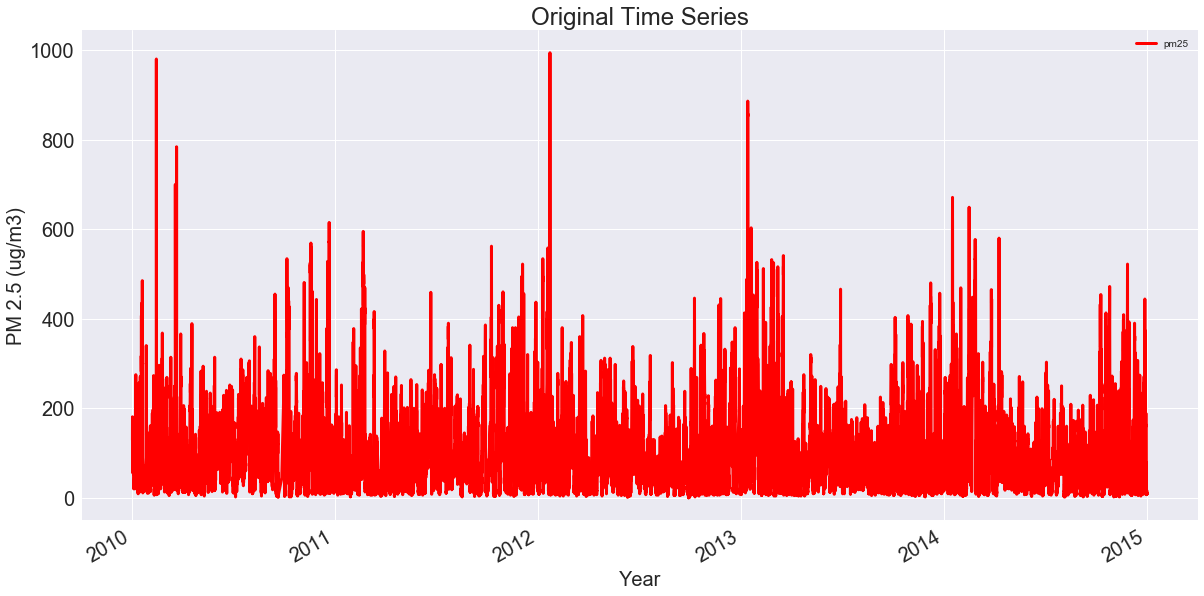

In [23]:
df[['pm25']].plot(figsize=(20,10), linewidth=3, fontsize=20, color='red')
plt.xlabel('Year', fontsize=20)
plt.title('Original Time Series', fontsize=24)
plt.ylabel('PM 2.5 (ug/m3)', fontsize=20);

#### 4.1 ACF and PACF 

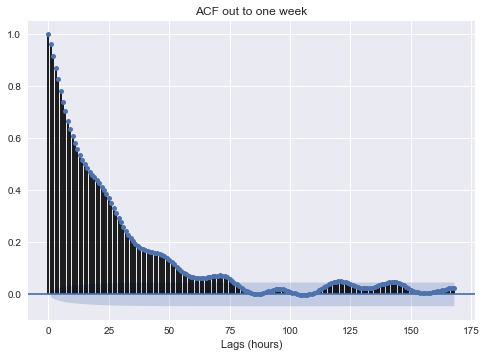

In [29]:
# Compute the autocorrelation and partial autocorrelation of the original time series
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

pm25 = df['pm25']

plot_acf(pm25, lags=168)  
plt.title('ACF out to one week')
plt.xlabel('Lags (hours)');

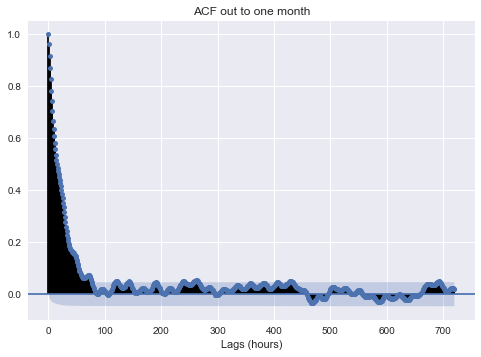

In [32]:
plot_acf(pm25, lags = 720) 
plt.title('ACF out to one month')
plt.xlabel('Lags (hours)');

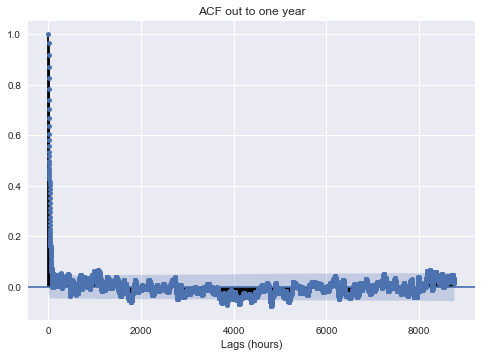

In [31]:
plot_acf(pm25, lags = 8760) 
plt.title('ACF out to one year')
plt.xlabel('Lags (hours)');

The ACF plots show a strong autocorrelation out to ~ 72 hours. 

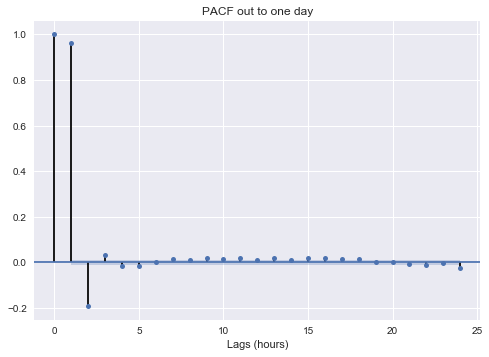

In [35]:
plot_pacf(pm25, lags=24)  
plt.title('PACF out to one day')
plt.xlabel('Lags (hours)');

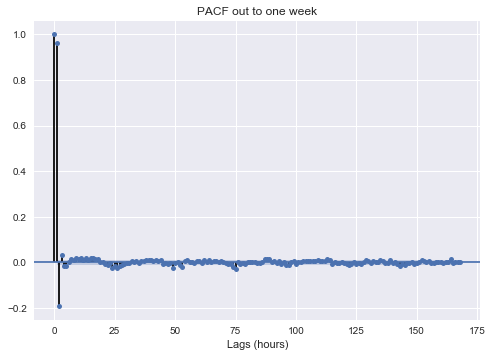

In [34]:
plot_pacf(pm25, lags = 168)  
plt.title('PACF out to one week')
plt.xlabel('Lags (hours)');

The PACF figures show that there is not much significant autocorrelation explained by lags greater than 5 hours.

#### 4.2 Decomposition

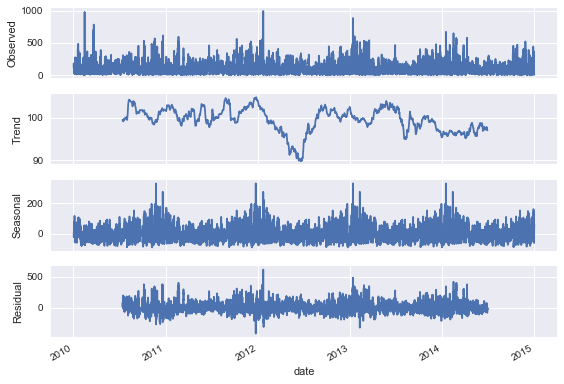

In [44]:
# Let's look at the seasonal decomposition provided by statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(pm25, model='additive', freq=8760) # one year
fig = decomposition.plot();

At a one-year frequency,  we see a pronounced trend and seasonality. 

#### 4.3 Moving Average
Now let's try to remove the trend and seasonality (ie, stationarize the time series).

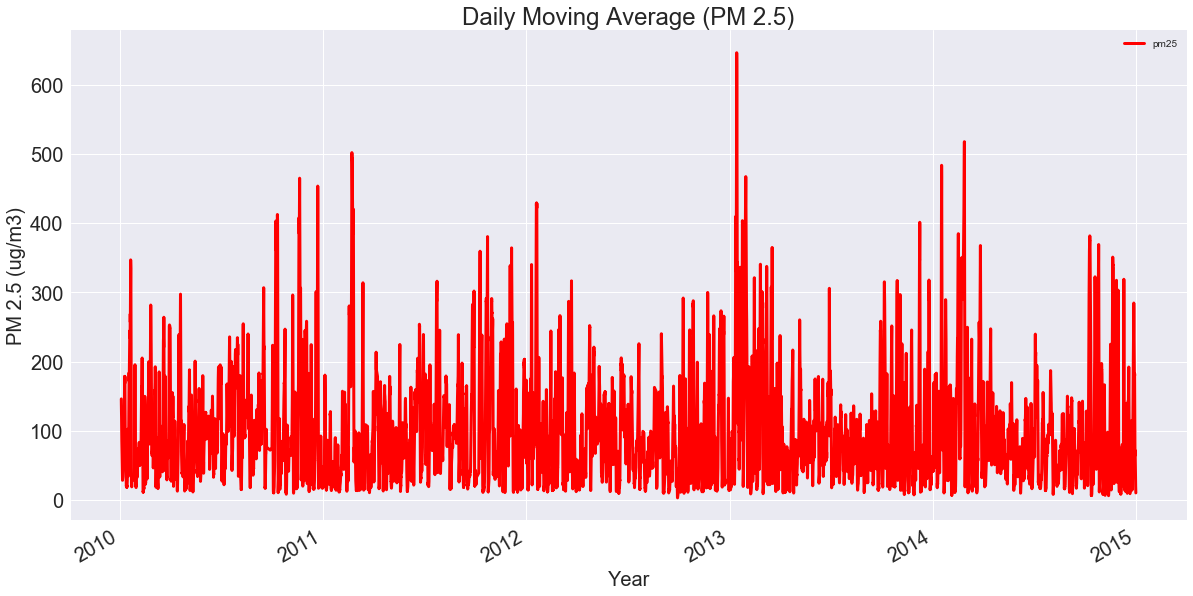

In [53]:
# Plot the moving average. This smooths out noise and seasonality and reveals trend.
pm25.rolling(window=24).mean().plot(figsize=(20,10), linewidth=3, fontsize=20, color='red') 
plt.xlabel('Year', fontsize=20)
plt.title('Daily Moving Average (PM 2.5)', fontsize=24);
plt.ylabel('PM 2.5 (ug/m3)', fontsize=20);

The above figure is still noisy. Let's see if we can see a clearer trend by expanding the window size.

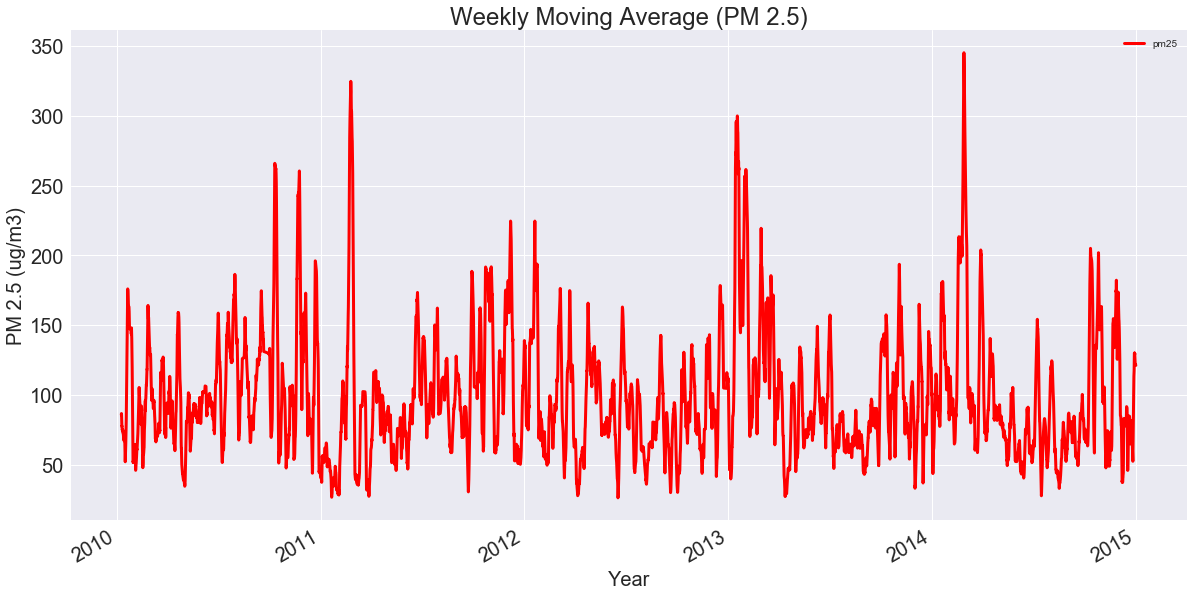

In [54]:
pm25.rolling(window=168).mean().plot(figsize=(20,10), linewidth=3, fontsize=20, color='red') #weekly
plt.xlabel('Year', fontsize=20)
plt.title('Weekly Moving Average (PM 2.5)', fontsize=24);
plt.ylabel('PM 2.5 (ug/m3)', fontsize=20);

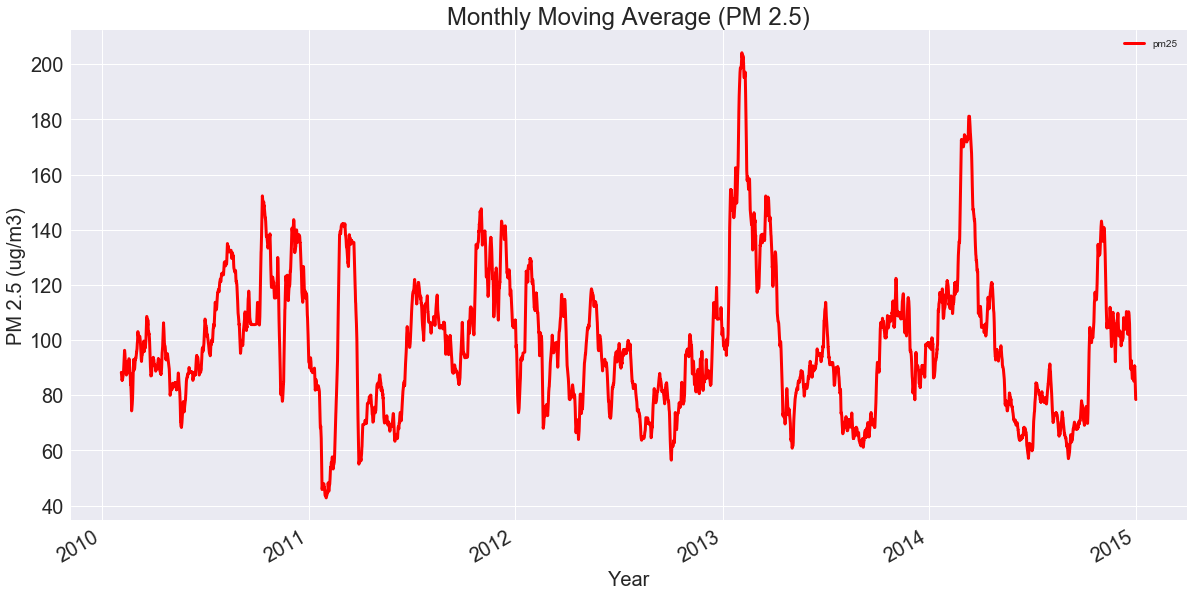

In [55]:
pm25.rolling(window=720).mean().plot(figsize=(20,10), linewidth=3, fontsize=20, color='red') #monthly
plt.xlabel('Year', fontsize=20)
plt.title('Monthly Moving Average (PM 2.5)', fontsize=24);
plt.ylabel('PM 2.5 (ug/m3)', fontsize=20);

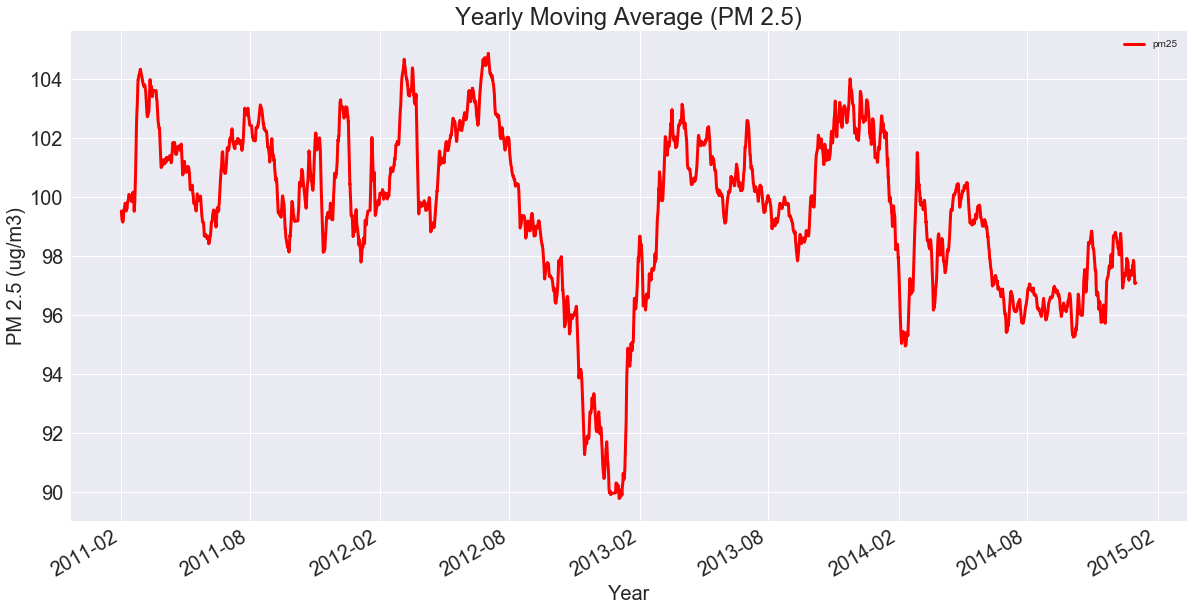

In [56]:
pm25.rolling(window=8760).mean().plot(figsize=(20,10), linewidth=3, fontsize=20, color='red')
plt.xlabel('Year', fontsize=20)
plt.title('Yearly Moving Average (PM 2.5)', fontsize=24);
plt.ylabel('PM 2.5 (ug/m3)', fontsize=20);

- There is a fairly steady trend between early-2011 to mid-2012, a sharp decreasing trend into early-2013, followed by a sharp increase into mid-2013, followed by a slowly decreasing trend into 2015.

#### 4.4 Differencing

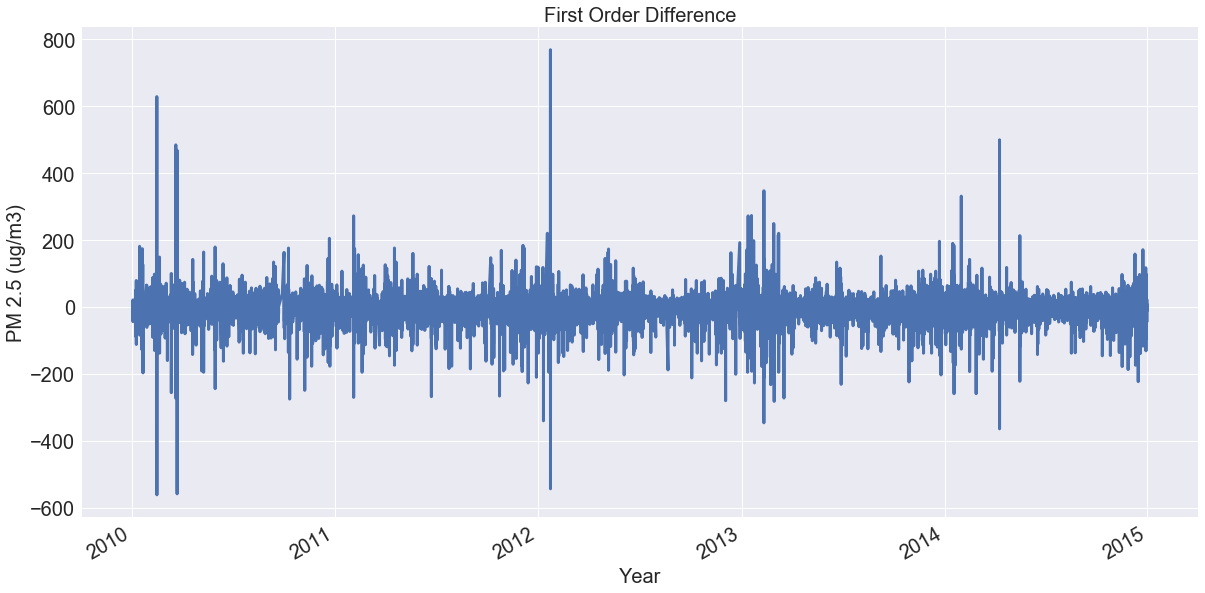

In [52]:
# Plot the first-order difference. This stabilizes the mean (ie removes the trend)
df['first_difference'] = df['pm25'] - df['pm25'].shift()
df['first_difference'].plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title('First Order Difference', fontsize=20)
plt.ylabel('PM 2.5 (ug/m3)', fontsize=20);

- First-order differencing seems to have done a decent job removing the trend. However,there are still some large differences in the variance above; let's try a log transform.

#### 4.5 Log transform

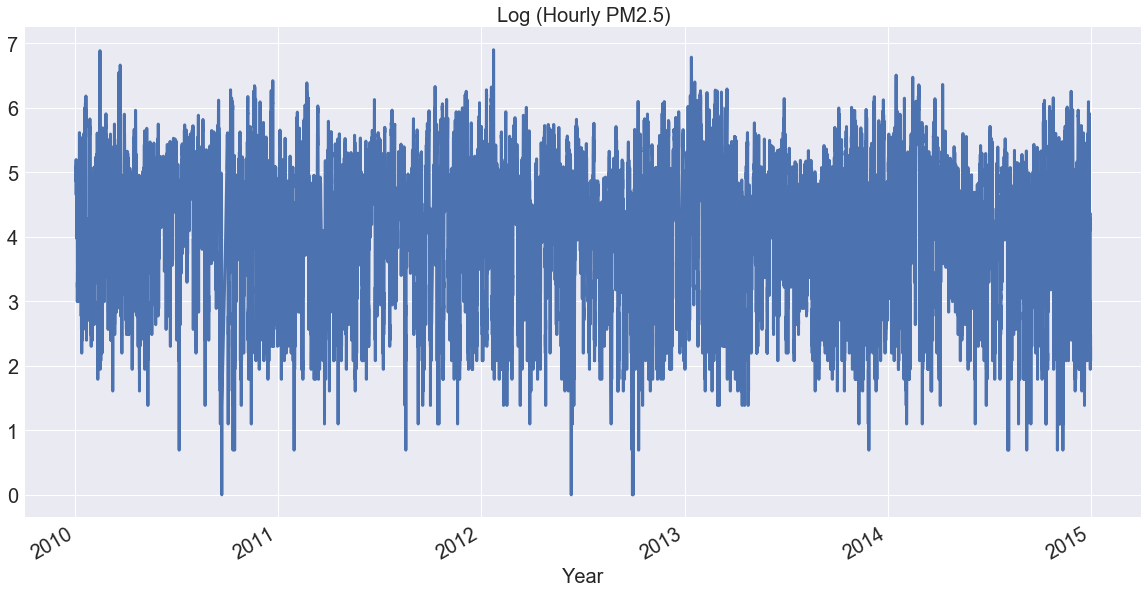

In [59]:
# Plot the log. This stabilizes the variance 
df['log'] = df['pm25'].apply(lambda x: np.log(x))

df['log'].plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title('Log (Hourly PM2.5)', fontsize=20);

- The log transformation has made the varance relatively constant (at least of the same order of magnitude).

#### 4.6 Combine transformations: log and first-order difference

/Users/tami/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


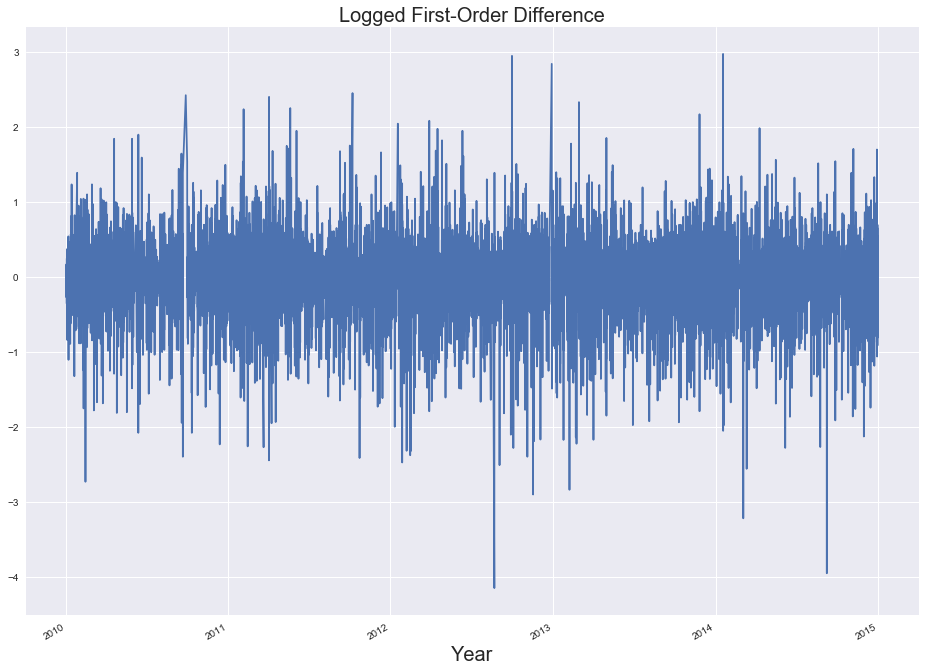

In [62]:
# Take the first difference of the logged value
df['log_first_difference'] = np.log(df['pm25']).diff().dropna()

df['log_first_difference'].plot(figsize=(16,12))
plt.xlabel('Year', fontsize=20)
plt.title('Logged First-Order Difference', fontsize=20);

- We now have what appears to be a stationary time series model of the hourly `pm2.5` concentration.

Let's test for stationarity statistically using the Dickey-Fuller Test

#### 4.7 Test for Stationarity

We just want rho .ne. 1 (rho = 1 means not stationary)

In [66]:
# Perform Augmented Dickey Fuller test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['pm25'])
print('Test Statistic:', dftest[0])
print('p-value:', dftest[1])
print('# Lags used:', dftest[2])
print('Number of observations used:', dftest[3])
print('Critical Values:', dftest[4])

Test Statistic: -20.6068246464
p-value: 0.0
# Lags used: 54
Number of observations used: 41702
Critical Values: {'1%': -3.4305068198783828, '5%': -2.8616093108616596, '10%': -2.5668068919322544}


According to the adfuller results, the `pm25` series is already stationary, before applying the log and difference transformations. (Test statistic is less than the 1% critical value).

In [67]:
dftest = adfuller(df['log_first_difference'])
print('Test Statistic:', dftest[0])
print('p-value:', dftest[1])
print('# Lags used:', dftest[2])
print('Number of observations used:', dftest[3])
print('Critical Values:', dftest[4])

/Users/tami/anaconda/lib/python3.6/site-packages/numpy/linalg/linalg.py:1591: RuntimeWarning: invalid value encountered in greater
  return sum(S > tol)


LinAlgError: SVD did not converge

Why can we not complete the test for stationarity with the logged-differenced time series?

### 5. Forecasting
#### 5.1 Let's try fitting an ARIMA model to forecast the PM 2.5.